# Classification with a control channel: Don't cheat yourself!

Gilles Louppe -- [@glouppe](https://twitter.com/glouppe) <br />
Tim Head -- [@betatim](https://twitter.com/betatim)

Last changed on August 4, 2015.

### Note

The conclusions here apply when following the protocol used in the Kaggle [Flavours of physics](https://www.kaggle.com/c/flavours-of-physics/) challenge.


# Abstract

In High Energy Physics classifiers are often trained on a mixture of simulated and real samples/events. In this notebook we show how and why checks on control channels to compare the classifier's response on real and simulated events/samples can be bypassed (accidentally or on purpose). Overall, this study calls for caution: the obtained classifier might not be as reliable as estimated, even if tests on control channels pass. In particular, a passing control channel test does not guarantee that the classifier does not leverage discriminative simulation imperfections.

# Setting

## Notation

Let us assume a set of _cases_ or _objects_ taken from a universe $\Omega$. Let us further assume that each object is described by a set of _measurements_ and let us arrange these measurements in some pre-assigned order, i.e., take the input values to be $x_1, x_2, ..., x_p$, where $x_j \in {\cal X}_j$ (for $j=1, ..., p$) corresponds to the value of the input variable $X_j$. Together, the input values $(x_1, ..., x_p)$ form a $p$-dimensional input vector ${\bf x}$ taking its values in ${\cal X}_1 \times ... \times {\cal X}_p = {\cal X}$, where ${\cal X}$ is defined as the input space. Similarly, let us define as $y \in {\cal Y}$ the value of the output variable $Y$, where ${\cal Y}$ is defined as the output space. By definition, both the input and the output spaces are assumed to respectively contain all possible input vectors and all possible output values. 

_Note._ Input variables are also known as _features_ or _descriptors_, input vectors as _instances_, or _samples_ and the output variable as _target_ or _response_.

_Note._ In High Energy Physics _samples_ are referred to as _events_, and _features_ as _variables_. We will use these terms interchangeably in this notebook.

## Supervised learning

Let us assume a learning set ${\cal L}$ composed of $N$ pairs of input vectors and output values $({\bf x}_1, y_1), ..., ({\bf x}_N, y_N)$, where ${\bf x}_i \in {\cal X}$ and $y_i \in {\cal Y}$. In this framework, the supervised learning task can be stated as learning a function (or _model_) $\varphi : {\cal X} \mapsto {\cal Y}$ from ${\cal L}$. In particular, the objective is to find a model such that its predictions $\varphi({\bf x})$, also denoted by the variable $\hat{Y}$, are as good as possible.

The innput and output variables $X_1, ..., X_p$ and $Y$ are _random variables_ taking their joint values from ${\cal X} \times {\cal Y}$ with respect to the joint probability distribution $P(X, Y)$, where $X$ denotes the random vector $(X_1, ..., X_p)$. That is, $P(X={\bf x}, Y=y)$ is the probability that random variables $X$ and $Y$ take values ${\bf x}$ and $y$ from ${\cal X}$ and ${\cal Y}$ when drawing an object uniformly at random from the universe $\Omega$. Accordingly, trying to learn a model $\varphi_{\cal L}$ whose predictions are as good as possible can be stated as finding a model which minimizes or maximizes some scoring function in expectation over $X,Y$ (e.g., minimizing the expected prediction error or maximizing the expected ROC AUC).

In practice, simplifying assumptions are made to solve supervised learning. In particular, one often assumes that the very best model, or at least a good approximation of it, lives in a family ${\cal H}$ of candidate models, also known as _hypotheses_, of restricted structure (e.g., the family of linear models or the family of decision trees). In this sense, learning amounts to constructing or finding a model in ${\cal H}$ for which the scoring function is as low (resp. high) as possible.

# Classification of events in high energy physics

In high energy physics, experimentalists build detectors for the observation and discovery of a phenomenon predicted by some theoretical model (e.g., the discovery of the Higgs boson as predicted by the Standard Model). To achieve this, classifiers are often built on simulated data and then used to evaluate real data as observed and recorded through the detector. Provided a classifier trained on simulated data transfers to real data, the goal is then to assess whether the predicted phenomenon exists with high level of confidence.

In machine learning terms, let us assume a universe of objects, or _events_, each described by a vector of physical input values ${\bf x} = (x_1, ..., x_p)$. Let us further assume that some of these events correspond to _signal_ ($y=s$), the phenomenon of interest, while others correspond to _background_ ($y=b$), a known and verified physical process.

In this setting, given a learning set ${\cal L}$ of (i) simulated signal and (ii) real data background, supervised learning algorithms can be used to find a model $\varphi : {\cal X} \mapsto {\cal Y}$, where ${\cal Y} = \{s, b\}$, capable of distinguishing signal from background events given physical input values.

## Control channel

The simulation is not be exempt of inaccuracies, often discriminative patterns exist between simulated and real data events. Therefore caution should be taken when learning a classifier $\varphi$.  It should not exploit simulation artefacts to indirectly separate signal from background. Exploiting these imperfections in the simulation would lead to a model whose  performance on simulated events (separating simulated signal from simulated background) might significantly differ from its actual performance on data (separating real signal from real background), therefore making it far less reliable in an actual experiment pipeline. 

To prevent this, the learned classifier is required to not have a large discrepancy when applied to simulated and real data. In practice, this can be verified by evaluating whether the classifier behaves differently on simulated signal and real data signal from a _control channel_. A phenomenon with a topology similar to the phenomenon under study, but with a well-known and well-observed behavior. 

More formally, let us assume control channel events, comprising both simulated signal and real data signal from a phenomenon similar to the one we wish to observ, and respectively denoted as ${\cal C}^\text{sim} = \{  {\bf x}_1, ..., {\bf x}_{N_\text{sim}} \}$ and ${\cal C}^\text{data} = \{ {\bf x}_1, ..., {\bf x}_{N_\text{data}}\}$. We want to find a model $\varphi$ which is as good as possible, while ensuring that the distributions of $\varphi({\bf x})$ are not significantly different for ${\bf x} \in {\cal C}^\text{sim}$ and for ${\bf x} \in {\cal C}^\text{data}$. 

_Example._ A _control channel test_ consists in requiring the Kolmogorov-Smirnov test statistic between the two samples $\{ \varphi({\bf x}) | {\bf x} \in {\cal C}^\text{sim} \}$ and $\{ \varphi({\bf x}) | {\bf x} \in {\cal C}^\text{data} \}$ to be strictly smaller than some pre-defined threshold $t$.

Equivalently, this can be stated as restricting the family ${\cal H}$ of candidate models to the family $\bar{{\cal H}} \subseteq {\cal H}$ for which the control channel test is satisfied. The open problem is then to adapt supervised learning algorithms to best navigate this restricted space of models. 


# Negative result: Control channel tests can be bypassed, even by chance

_Proposition._ Assuming that
1. control data can be distinguished from training data with high confidence,
2. simulated features are more discriminative than they are in real data,

Then, even by chance, a learning procedure exploring $\bar{{\cal H}}$ might capture and exploit differences between control and training data to pass the control channel test and overfit with respect to real data.

_Corollary._ Even if the control channel test passes, the true performance of the classifier on real data may be significantly different (typically lower) than expected.

_Corollary._ The choice of the control channel matters. The closer the distribution of the control signal to the distribution of the signal under study, the less likely the classifier is to exploit the defects, and is therefore more reliable for real data.

# Toy example

As an illustrative example, let us consider an artificial classification problem between signal and background events, along with some close control channel data ${\cal C}^\text{sim}$ and ${\cal C}^\text{data}$. Let us assume an input space defined on three input variables $X_1, X_2, X_3$,
such that 

- $X_1$ is irrelevant for discrimination between real data signal and real data background but, because of simulation imperfections, has discriminative power between simulated events and real data events ;
- $X_2$ is discriminative between signal and background events ;
- $X_3$ is discriminative between events from the original problem and the control channel, but has otherwise no discriminative power between signal and background events.

In [1]:
%matplotlib inline

import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8, 8

In [2]:
# Generate data
from scipy.stats import norm

parameters = {
    "signal-data":      [(0, 1),     (2, 1),     (0, 1)],
    "signal-sim":       [(3, 1),     (2.2, 1),   (0, 1)],
    "background-data":  [(0, 1),     (-1, 1),    (0, 1)],
    "control-data":     [(0.3, 1.2), (2.3, 1.2), (3, 1)],
    "control-sim":      [(3.3, 1.2), (2.5, 1.2), (3, 1)],
}

def build(label, n_samples=10000): 
    p = parameters[label]
    
    X = np.empty((n_samples, 3))
    X[:, 0] = norm(*p[0]).rvs(n_samples)
    X[:, 1] = norm(*p[1]).rvs(n_samples)
    X[:, 2] = norm(*p[2]).rvs(n_samples)
    
    return X

X_signal_data = build("signal-data")
X_signal_sim = build("signal-sim")
X_background_data = build("background-data")
X_control_data = build("control-data")
X_control_sim = build("control-sim")

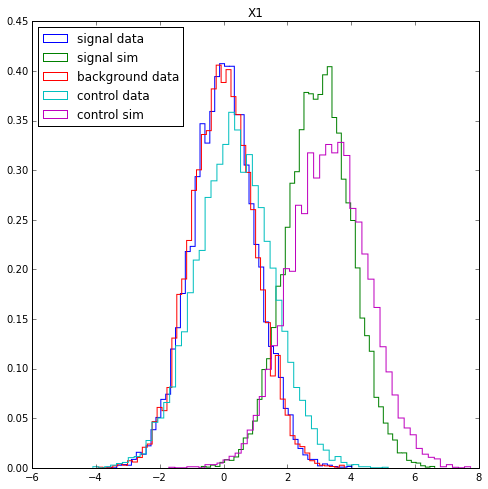

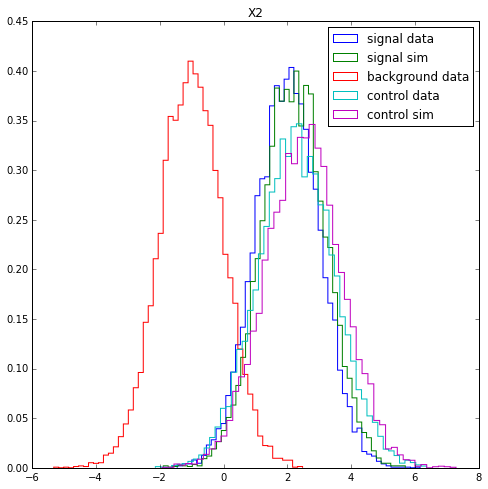

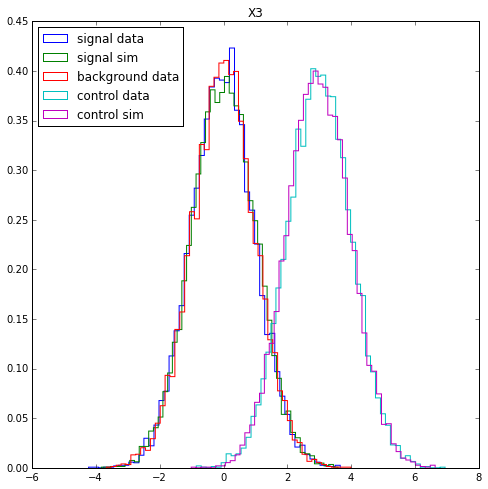

In [3]:
# Plot the distributions
for i in range(3):
    plt.hist(X_signal_data[:, i], normed=1, bins=50, histtype="step", label="signal data")
    plt.hist(X_signal_sim[:, i], normed=1, bins=50, histtype="step", label="signal sim")
    plt.hist(X_background_data[:, i], normed=1, bins=50, histtype="step", label="background data")
    plt.hist(X_control_data[:, i], normed=1, bins=50, histtype="step", label="control data")
    plt.hist(X_control_sim[:, i], normed=1, bins=50, histtype="step", label="control sim")
    plt.legend(loc="best")
    plt.title("X%d" % (i+1))

    plt.show()

We now build a random forest on simulated signal versus real data background:

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split

X = np.vstack((X_background_data, X_signal_sim))
y = np.concatenate((np.zeros(len(X_background_data)), np.ones(len(X_signal_sim))))
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=1)
X_data = np.vstack((X_background_data, X_signal_data))
y_data = np.concatenate((np.zeros(len(X_background_data)), np.ones(len(X_signal_data))))

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

print "ROC AUC (simulated signal vs. data background) =", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print "ROC AUC (data signal vs. data background) =", roc_auc_score(y_data, rf.predict_proba(X_data)[:, 1])  

ROC AUC (simulated signal vs. data background) = 0.998003674128
ROC AUC (data signal vs. data background) = 0.943449695


As the results show, the true performance on real data signal and real data background events is significantly lower that the expected performance of the forest, as estimated on simulated signal and real data background events.

The Kolmogorov-Smirnov statistic on simulated signal and data signal events from the control channel is indeed quite large, suggesting that the random forest has picked discriminative features between simulated and real data events rather than discriminative features between signal and background events.

In [5]:
from sklearn.metrics import roc_curve

def ks_statistic(pred_sim, pred_data):
    y = np.concatenate((np.ones(len(pred_sim)), np.zeros(len(pred_data))))
    pred = np.concatenate((pred_sim, pred_data))
    fpr, tpr, _ = roc_curve(y, pred)
    return np.max(np.abs(fpr - tpr))

print "KS statistic =", ks_statistic(rf.predict_proba(X_control_sim)[:, 1],
                                     rf.predict_proba(X_control_data)[:, 1]) 

KS statistic = 0.6563


Indeed, as the variable importances of the forest show, $X_1$ is used as discriminative variable, while it has in fact no power on real data:

In [6]:
rf.feature_importances_

array([ 0.46063437,  0.52114898,  0.01821664])

To prevent the classifier from using imperfections in the simulation as discriminative features we restrict our family of models to those for which the KS statistic is lower than `t=0.09`.

The open problem is now how to best navigate $\bar{{\cal H}}$? For lack of a better procedure, we randomly explore a small fraction of the family of totally randomized trees:

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

def find_best_tree(threshold, X_train, y_train, 
                              X_test, y_test, 
                              X_data, y_data, 
                              X_control_sim, X_control_data, n_trials=2000):
    best_auc_test = 0
    best_auc_data = 0
    best_ks = 0
    best_tree = None

    for seed in range(n_trials):
        clf = ExtraTreesClassifier(n_estimators=1, max_features=1,
                                   max_leaf_nodes=5, random_state=seed)
        clf.fit(X_train, y_train)

        auc_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])   
        auc_data = roc_auc_score(y_data, clf.predict_proba(X_data)[:, 1])
        ks = ks_statistic(clf.predict_proba(X_control_sim)[:, 1],
                          clf.predict_proba(X_control_data)[:, 1])

        if auc_test > best_auc_test and ks < threshold:
            best_auc_test = auc_test
            best_auc_data = auc_data
            best_ks = ks
            best_tree = clf
    
    return best_auc_test, best_auc_data, best_ks, best_tree

auc_test, auc_data, ks, tree = find_best_tree(0.09, X_train, y_train, 
                                                    X_test, y_test, 
                                                    X_data, y_data, 
                                                    X_control_sim, X_control_data)

print "ROC AUC (simulated signal vs. data background) =", auc_test
print "ROC AUC (data signal vs. data background) =", auc_data
print "KS statistic =", ks

ROC AUC (simulated signal vs. data background) = 0.986357983199
ROC AUC (data signal vs. data background) = 0.90973817
KS statistic = 0.0578


What just happened? By chance, we have found a classifier that

1. has seemingly good test performance (AUC=0.986 on simulated signal versus real data background); and
2. passes the control channel test that we have defined.

This classifier appears to be exactly the one we were seeking. It has very good performance on simulated signal versus real data background and it passes the KS test. This might lead us to believe that the classifier has not used the simulation artefacts of $X_1$. Therefore it should perform equally well on real data signal vs. real data background.

Wrong. The expected ROC AUC of 0.91 on real data signal and real data background is significantly lower than our first estimate, suggesting that there is still something wrong. Indeed, inspecting the variable importances of the classifier reveals that $X_1$ is still used to discriminate between signal and background:

In [8]:
tree.feature_importances_

array([  1.60000595e-01,   8.39935498e-01,   6.39069727e-05])

Let us now look at the tree we found:

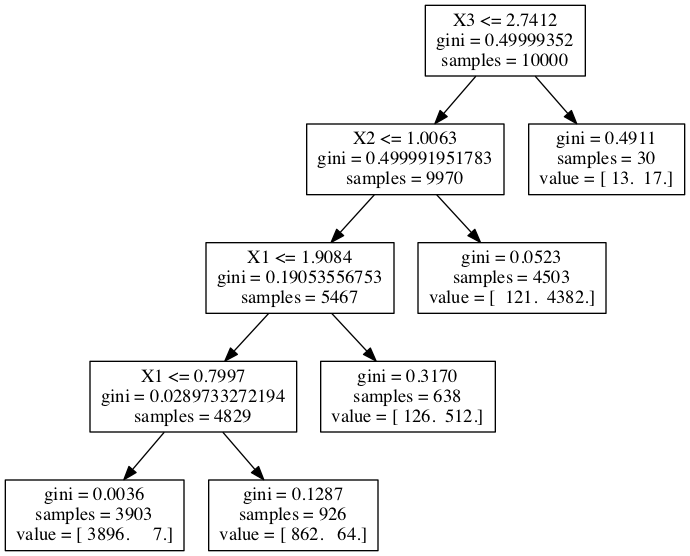

In [9]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
with open("tree.dot", 'w') as f:
    f = export_graphviz(tree.estimators_[0], out_file=f, feature_names=["X1", "X2", "X3"])
!dot -Tpng tree.dot -o tree.png
Image("tree.png")

As we can see, $X_3$ appears at the top of tree. By chance, we have found that splitting on this variable allows us to pass the control channel test (since it separates control data from the rest) thereby giving the other child nodes the freedom to exploit simulation artefacts to separate signal from background. This is illustrated by the later splits on $X_1$ in the left half of the tree. In other words, we managed to accidentally exploit differences between control and training data to circumvent the control channel test.

Note that we never explicitly told the model to separate control data from training data. We merely explored the space of valid models at random and kept the best one which also passes the test. Unfortunately the obtained model is not as reliable nor as useful for an actual experiment pipeline as we would expect from a model that passes the control channel test.

For this reason, we argue that any procedure exploring $\bar{{\cal H}}$ in some way or another (e.g., by random exploration, by repeatedly tuning hyper-parameters, by malicious intent, or by regularization injected in the learning procedure with respect to the KS statistic) will  suffer from the same problem, making the obtained models useless for real data. 

## Proof of concept: Finding τ → μμμ Kaggle challenge

In light of the previous example, we illustrate a more efficient/malicious procedure than random exploration to obtain similar models in the context of the [Flavours of physics](https://www.kaggle.com/c/flavours-of-physics/) Kaggle challenge:

1. learn to distinguish between training and control data,
2. build a classifier on training data, with all the freedom to exploit simulation artefacts,
3. assign predictions to samples predicted as control data, so that the test is passed (e.g., random predictions in the case of the KS statistic), otherwise predict using the classifier found in the previous step.

This is an efficient method, as currently showed by our [1st place ranking](https://www.kaggle.com/c/flavours-of-physics/leaderboard)  (August 3rd, LB score=0.990873) on the leaderboard.

# Conclusions

Control channel tests prevent some models to exploit simulation imperfections that are discriminative between simulation and real data, rather than between signal and background. However, as we have shown control channel tests do not exclude all such models. If control data can be distinguished from the training data, these differences may be exploited to put control data aside and then exploit simulation artefacts. Caution should therefore be taken: the obtained classifier might not perform as well as expected on real data, even if control channel tests pass.

Unfortunately, without real signal data, it is difficult to know whether control channel tests are successful because the classifier truely does not exploit simulation imperfections or because control data has been distinguished from training data.

For this reason, we stress that the choice of the control matters. The closer the distribution of the control channel signal to the distribution of the signal under study, the less likely it is that the classifier will manage to exploit the defects, and therefore it will be more reliable for real data. At the limit, the best control channel would be to use simulated signal and real data signal events from the _same_ phenomenon as the one under study. Unfortunately, this is a chicken and egg problem: we cannot collect real data signal events since establishing whether they exist or not is the original task.

---

_Suggestions, comments, ideas for a better test? Let's discuss! (Gilles Louppe -- [@glouppe](https://twitter.com/glouppe), Tim Head -- [@betatim](https://twitter.com/betatim))_